<a href="https://colab.research.google.com/github/IgorvH-Developer/ColaboratoryFailes/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_(%D0%B0%D0%BF%D1%80%D0%BE%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D1%86%D0%B8%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import math
from sympy import *

In [2]:
def func(x):
    return x * torch.log(x ** 2)

In [3]:
a, b = -1, 1
m = 3  # Степень полинома приближения
n = 5  # Количество узлов
x = torch.zeros(n)
for i in range(n):
    x[i] = round(a + (b - a) / n * i, 5)
y = torch.zeros((5,1))
y = func(x)
y.shape

torch.Size([5])

# 1) Полином наилучшего среднеквадратичного приближения 

In [ ]:
Q = torch.zeros((n, m + 1))
for i in range(n):
    for j in range(m + 1):  
        Q[i,j] = x[i] ** j 
H = torch.matmul(torch.transpose(Q,1,0), Q)
bVec = torch.matmul(torch.transpose(Q,1,0), y)
solution = torch.linalg.solve(H,bVec)
print('Вектор коэффициентов обобщенного полинома: ', solution)

temp = 0
avgDev = 0
for i in range(n):
    q = torch.tensor([1, x[i], x[i] **2, x[i]**3])
    temp += (sum(solution * q) - y[i]) ** 2
    avgDev = math.sqrt(temp / (n + 1))
print('Отклонение: ',avgDev)

Вектор коэффициентов обобщенного полинома:  tensor([-0.0632, -2.1133,  0.3764,  2.4747])
Отклонение:  0.16457565413941463


# 2) Полином наилучшего приближения в пространстве L2

In [ ]:
x2 = []
X = Symbol('X')
for t in range(n):
    x2.append(round(a + (b - a) / n * t, 5))

p = 1  # вес
c = []  # вектор коэффициентов многочленов наилучшего приближения
Ln = []  # полиномы Лагранжа
f = X * ln(X ** 2) 
for j in range(m+1):
    LnTmp = diff((1-X**2) ** (j), X, j) / (np.math.factorial(j) * 2 ** (j))
    Ln.append(LnTmp)
    int_1 = integrate(p * f * LnTmp, (X, -1, 1))
    int_2 = integrate(p * LnTmp ** 2, (X, -1, 1))
    c.append(round(int_1 / int_2, 6))
print('Коэфф многочлена наилучшего приближения: ', c)

temp = 0
for k in range(m+1):
    temp += c[k] ** 2 * integrate(p * Ln[k] ** 2, (X, -1, 1))
print('Отклонение:', integrate(p * f ** 2, (X, -1, 1)) - temp)

Коэфф многочлена наилучшего приближения:  [0, 0.666667, 0, -0.933333]
Отклонение: 0.0474073


# 3) Графики

In [ ]:
x = torch.Tensor(np.arange(-1, 1, 0.01))

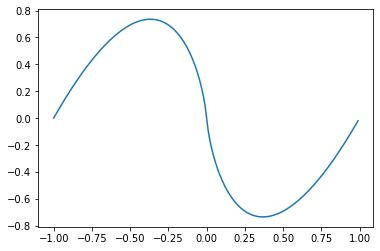

In [ ]:
mainF = func(x)
plt.plot(x, mainF)  # исходная функция

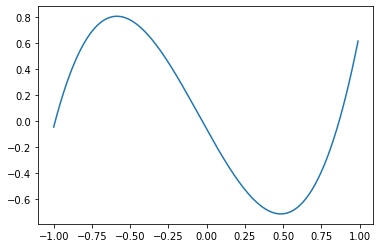

In [ ]:
newFunc1 = [sum(solution * torch.tensor([1,x[i],x[i] ** 2,x[i] ** 3])) for i in range(len(x))]
plt.plot(x, newFunc1)  # приближение методом наименьших квадратов

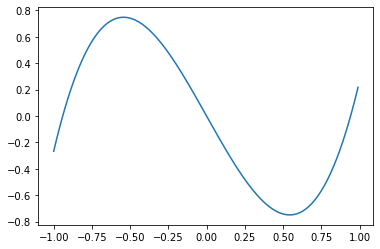

In [ ]:
newFunc2 = [sum(np.array(c) * 
                np.array([Ln[0].evalf(subs={X:x[i]}),Ln[1].evalf(subs={X:x[i]}), Ln[2].evalf(subs={X:x[i]}),Ln[3].evalf(subs={X:x[i]})])) for i in range(len(x))]

plt.plot(x, newFunc2)  # с помощью полиномов Лежандра

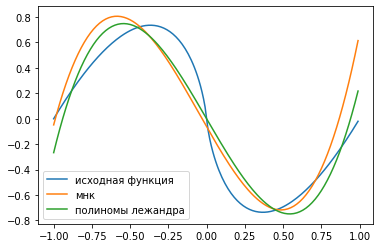

In [ ]:
all_graps = plt.plot(x, mainF, x, newFunc1, x, newFunc2)
plt.legend(['исходная функция', 'мнк', 'полиномы лежандра'])